In [4]:
from datetime import datetime
from datetime import timezone

In [5]:
timezone.utc

datetime.timezone.utc

In [6]:
datetime(2019,1,1) #timezone unawared datetime

datetime.datetime(2019, 1, 1, 0, 0)

In [7]:
datetime(2019,1,1,tzinfo=timezone.utc) #timezone awared datetime

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

utc밖에 정의 안되어 있어서 별도의 패키지를 사용한다.
conda install pytz

In [10]:
import pytz
KST = pytz.timezone('Asia/Seoul')

In [11]:
datetime(2019,1,1,tzinfo=timezone.utc) == pytz.UTC.localize(datetime(2019,1,1))

True

In [12]:
KST.localize(datetime(2019,1,1)) # UTC로부터 9시간 차이남.

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [13]:
#보통 datetime 바꿀때 replace를 쓴다.
mydate = datetime(2019,1,1)
mydate.replace(year = 2018)

datetime.datetime(2018, 1, 1, 0, 0)

In [14]:
mydate.replace(tzinfo = KST) #이렇게 KST로 바꾸면 

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [15]:
mydate_kst = KST.localize(mydate)

In [16]:
mydate_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [18]:
mydate_kst.astimezone(pytz.utc) == mydate_kst

True

strftime.org

In [19]:
mydate_kst.strftime("%Y-%m-%d %H;%M:%S %Z")

'2019-01-01 00;00:00 KST'

In [20]:
mydate_kst.astimezone(pytz.utc)

datetime.datetime(2018, 12, 31, 15, 0, tzinfo=<UTC>)

In [21]:
datetime.today() #어디에서 실행되느냐에 따라서 다르다.

datetime.datetime(2020, 12, 29, 11, 56, 45, 845880)

In [22]:
datetime.utcnow().astimezone(KST) #이렇게 쓰는게 더 안전하다.

datetime.datetime(2020, 12, 29, 2, 57, 51, 345004, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [23]:
#월 0 , 화 1, 수 2, 목 3 ...
today = datetime.today()
today.weekday()

1

In [26]:
#가장 최근 금요일을 구하라., 지난 금요일을 알아내야함.
def last_friday():
    today = KST.localize(datetime.today())
    offset = 4- today.weekday() % 4
    aweekago = today.replace(day= today.day-7)
    last_friday = aweekago.replace(day = aweekago.day+offset)
    return last_friday

In [27]:
last_friday()

datetime.datetime(2020, 12, 25, 12, 31, 37, 374714, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [29]:
#위에껀 문제가 있다. 왜냐하면 월초면 today replace되는게 월이 안바뀔거다.
from datetime import timedelta
pytz.utc.localize(mydate) -KST.localize(mydate)

datetime.timedelta(seconds=32400)

In [31]:
mydate

datetime.datetime(2019, 1, 1, 0, 0)

In [32]:
pytz.utc.localize(mydate) + timedelta(seconds = 32400)

datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>)

In [33]:
def last_friday():
    today = KST.localize(datetime.today())
    offset = 4- today.weekday() % 4
    aweekago = today -timedelta(weeks=1)
    #aweekago = today.replace(day= today.day-7)
    last_friday = aweekago + timedelta(days=offset)
    #last_friday = aweekago.replace(day = aweekago.day+offset)
    return last_friday

In [34]:
last_friday()

datetime.datetime(2020, 12, 25, 12, 40, 32, 719019, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_apple =\
pd.read_csv('./data/apple_stock.csv',index_col = 'Date', parse_dates = True)

<AxesSubplot:xlabel='Date'>

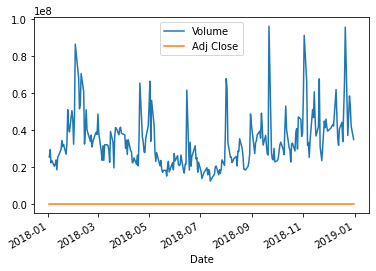

In [40]:
#볼륨과 Adj Close는 constant인것 같다. 둘의 scale이 너무 다름.
df_apple[['Volume', 'Adj Close']].plot()

Text(0.5, 1.0, 'APPL')

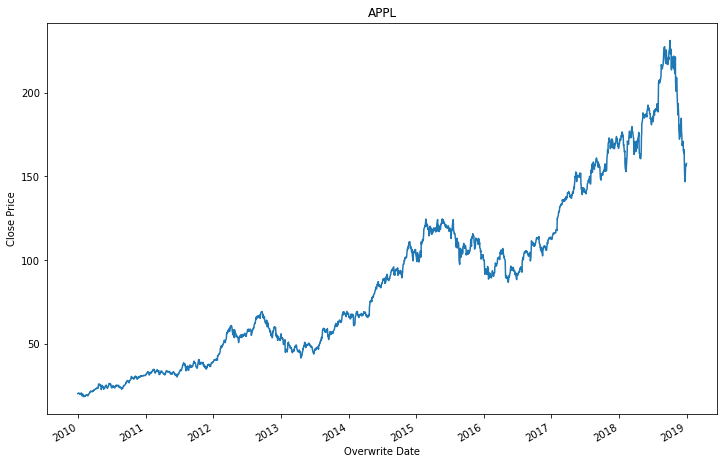

In [48]:
#한 cell에 있는 matplotlib에서 같은 그래프에 그려버림.
df_apple['Adj Close'].plot(figsize = [12,8])
plt.ylabel('Close Price')
plt.xlabel('Overwrite Date')
plt.title('APPL')

<AxesSubplot:xlabel='Date'>

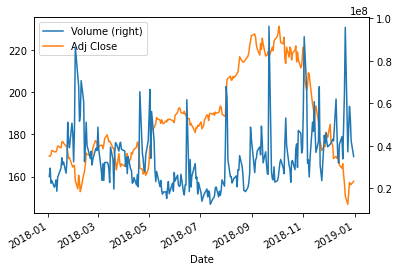

In [66]:
df_apple[['Volume', 'Adj Close']]['2018':].plot(secondary_y = ['Volume'])

<AxesSubplot:xlabel='Date'>

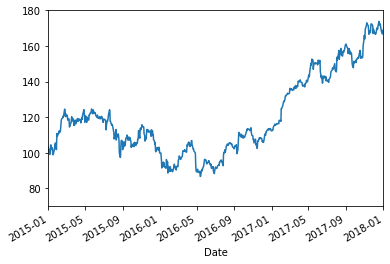

In [59]:
#df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot()
df_apple['Adj Close'].plot(xlim = ['2015-01-01','2018-01-01'],ylim = [70, 180])

In [60]:
index = df_apple['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']

In [64]:
import matplotlib.dates as dates

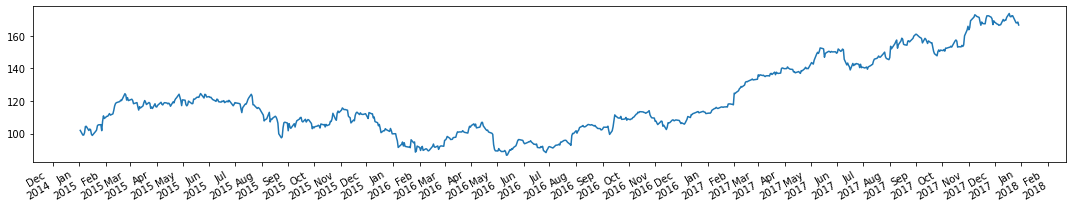

In [65]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot_date(index, stock, '-')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
fig.autofmt_xdate() ##오호.
plt.tight_layout()